## 206-shinahaudrey-cleannotebook-3
Hi! This is Shinah. In this notebook, I will show you histograms and maps that help understanding LA County and Seoul. Operations I do in this notebooks include making functions for iterative processes like making historgram and maps. Here, also, I try to plot two dataset on one map to find the relationship between the two variables.

### Commute mode

Import libraries

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Import files

In [2]:
LA_pop = gpd.read_file('data/LA_pop.json')
LA_jobs = gpd.read_file('data/LA_jobs.json')
LA_commute = gpd.read_file('data/LA_com.json')
Seoul_pop_job_commute  = gpd.read_file('data/Seoul_master.json')
Seoul_ride = gpd.read_file('data/Seoul_rail_ridership2.json')

Make function to get histograms efficiently.

In [3]:
def get_histogram(column = 'Percent Public transportation (excluding taxicab)'):
    series_to_plot=LA_commute[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=50,color='lightgreen', edgecolor='grey')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in Los Angeles County')

In [4]:
indicators = [ 'Percent Public transportation (excluding taxicab)',
 'Percent Car, truck, or van']

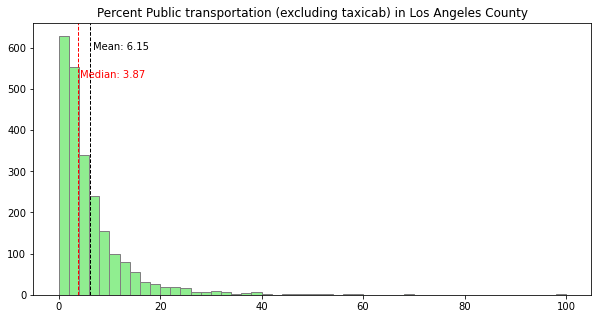

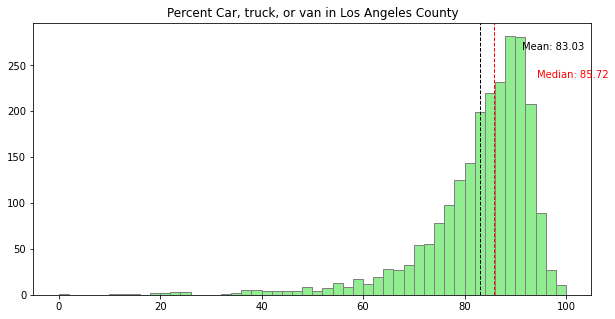

In [5]:
for x in indicators:
    get_histogram(column=x)

The first histogram is negatively skewed and the mean is higher than the median. This clearly shows that most of the census tracts in LA County have quite low percentage for commute by transit.   
The second histogram is positively skewed and the median is higher than the mean. This clearly shows that LA county relies heavily on car when commute.

Make functions for getting historgrams. This time, it is for Seoul.

In [6]:
def get_histogram2(column = 'Public_transportation'):
    series_to_plot=Seoul_pop_job_commute[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=50,color='lightgreen', edgecolor='grey', alpha=0.7)

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='lightblue', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in Seoul')

In [7]:
indicators2 = [ 'Public_transportation',
               'Car']

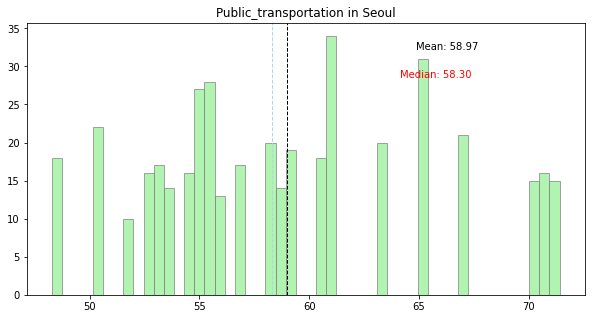

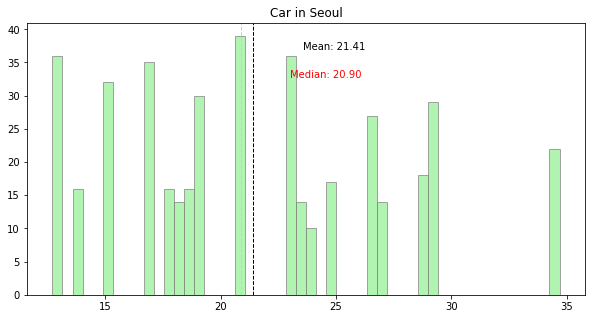

In [8]:
for x in indicators2:
    get_histogram2(column=x)

By looking at the the histogram, we can know that there is no area in Seoul that relies heavily on either way. But the range of percent public transportation is 45%-75% for Seoul and this is surprising compared to LA County. And even the highest percent car is around 35% which is quite low compared to LA census tracts' values.

### Ridership

We requested data for LA ridership by stations to LA Metro and are waiting for response.   
Thus, only Seoul ridership is addressed here.

Plot the most basic version of map to see overall shape.

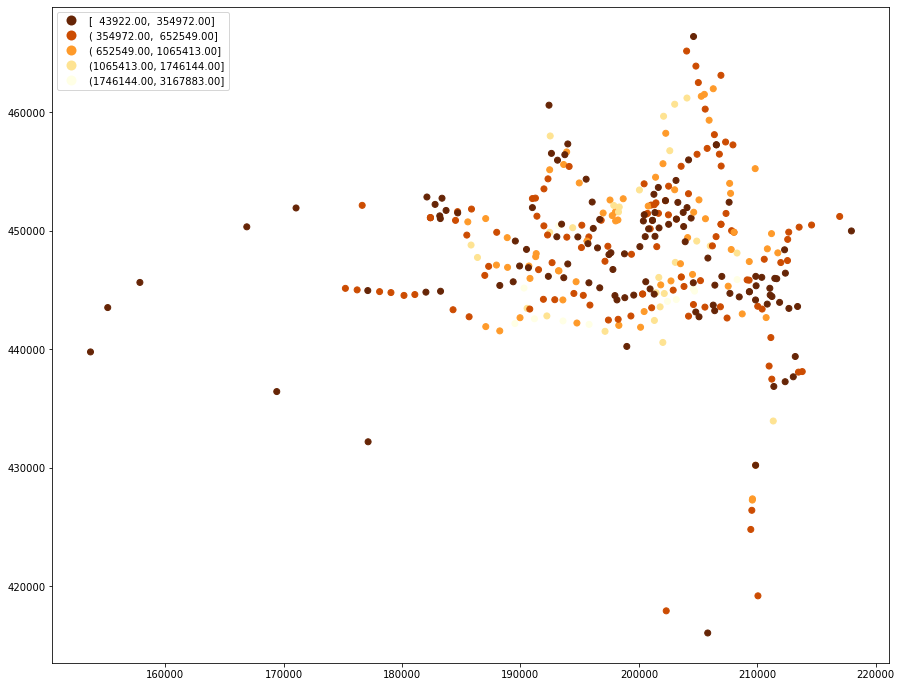

In [9]:
Seoul_ride.plot(figsize=(15,15),
                 column='ridership',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='YlOrBr_r')

Change crs from EPSG:5174 to EPSG:3857 to use contextily

In [10]:
Seoul_ride_web_mercator = Seoul_ride.to_crs(epsg=3857)

Plot the stations on the basemap

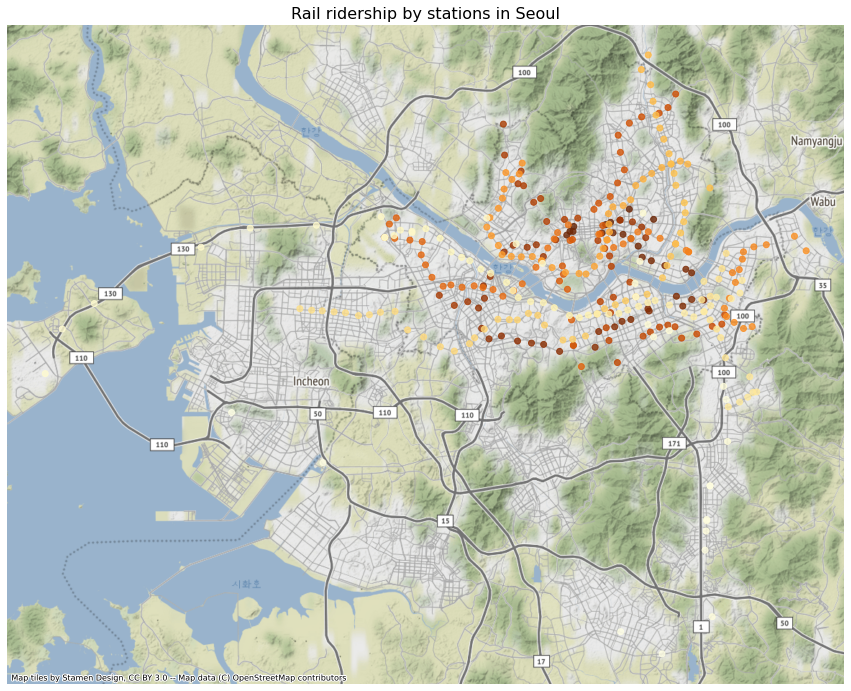

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))

Seoul_ride_web_mercator[Seoul_ride_web_mercator['ridership'] >= 0].plot(ax=ax, alpha=0.8, cmap='YlOrBr_r', scheme='NaturalBreaks')

ax.axis('off')
ax.set_title('Rail ridership by stations in Seoul',fontsize=16)
#ax.set_ylim(37.3,37.8)

ctx.add_basemap(ax)

It is well distributed, but cannot derive significant information by looking at this. I'm going to overlay this with other data below.

### Population density

In [ ]:
LA_pop.head()

Check distribution of density within the county.

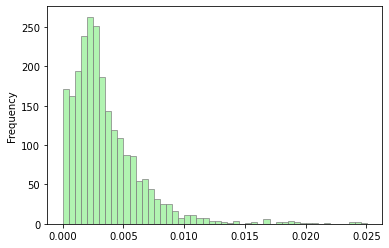

In [12]:
LA_pop['pop_density'].plot.hist(bins=50,
                               color='lightgreen', edgecolor='grey', alpha=0.7)

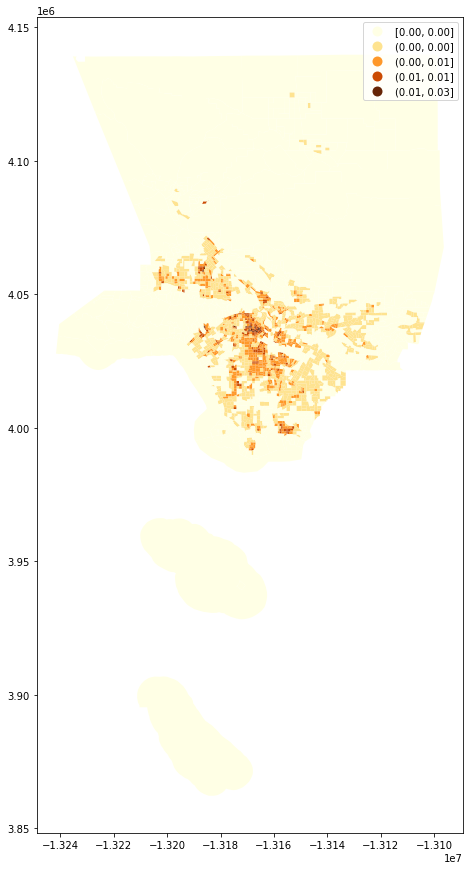

In [13]:
ax = LA_pop.plot(figsize=(15,15),
                 column='pop_density',
                 legend=True, 
                 scheme='NaturalBreaks',
                 cmap='YlOrBr')
#ax.set_ylim(33.6,34.9)

Check the populatino distribution within Seoul.

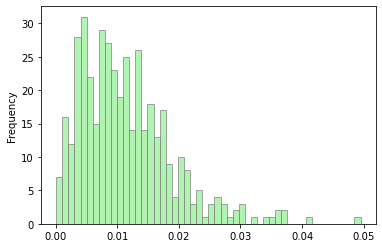

In [14]:
Seoul_pop_job_commute['Pop_Density'].plot.hist(bins=50,
                               color='lightgreen', edgecolor='grey', alpha=0.7)

Not surprisingly, the distribution is less skewed than LA County because we assume that Seoul has higher pecent of urbanizaed area than LA County.

Overlay population density map and ridership point data of Seoul railway

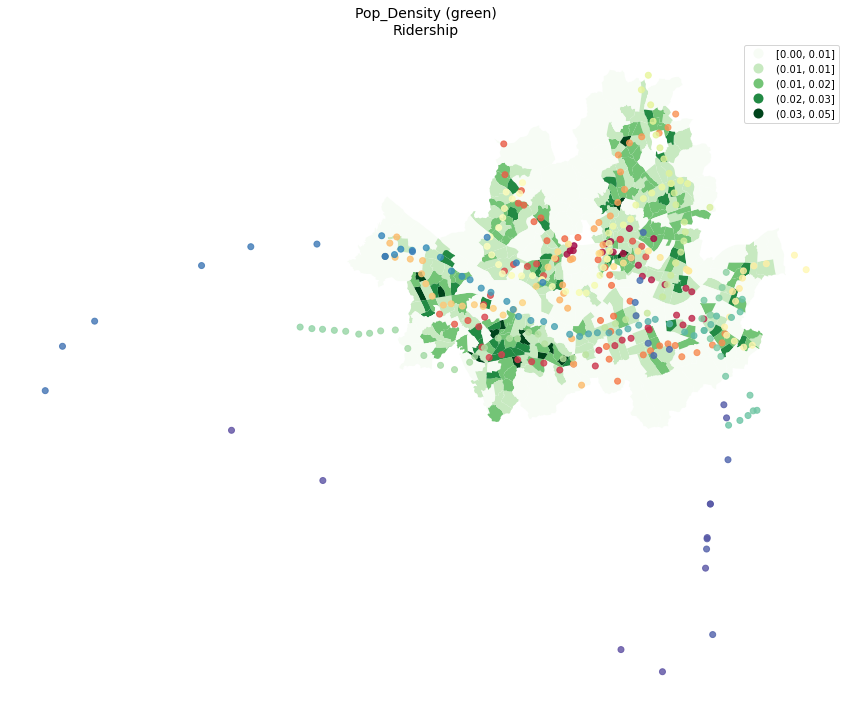

In [15]:
column1 = 'Pop_Density'
column2 = 'ridership'
fig,ax = plt.subplots(figsize=(15,15))

Seoul_pop_job_commute.plot(ax=ax,
         column=column1,
         legend=True,
         scheme='NaturalBreaks',
         cmap='Greens'
        )

Seoul_ride[Seoul_ride['ridership'] >= 10].plot(ax=ax,
        alpha=.8,
        linewidth=1,
        scheme='NaturalBreaks',
        cmap='Spectral'
        )
#ax.set_ylim(37.3,37.8)
ax.set_title(column1 + ' (green)\n' + 'Ridership', fontsize=14)
ax.axis('off');

The center of the city does have high ridership, but the popultion there isn't high. This makes us to think that this might be a place where a lot of jobs are located. The SouthWest part of Seoul has high ridership and also high population.   

**I want to set the limit when plotting the map that includes Seoul ridership like we did for Catalina Island in the class. I will try drawing the map within few days by following Yoh's recommendation to import the rectangular polygon that encompasses the Seoul area only, excluding the stations that are located outside of Seoul boundary.**

### Job density

Check the distribution of jobs within LA County

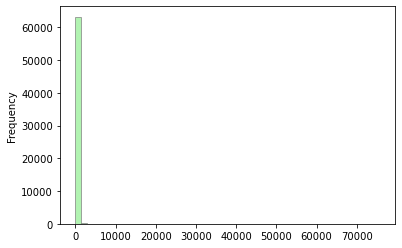

In [16]:
LA_jobs['Job Count'].plot.hist(bins=50,
                               color='lightgreen', edgecolor='grey', alpha=0.7)

The dataset includes points that has jobs counts in it and it is hard to see the distribution by histogram in this case.

Check the distribution of jobs within Seoul

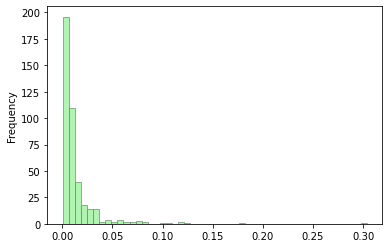

In [17]:
Seoul_pop_job_commute['Work_Density'].plot.hist(bins=50,
                               color='lightgreen', edgecolor='grey', alpha=0.7)

We can see that jobs tend to be located predominantly in a few CBDs.

Overlay job density map and ridership point data of Seoul railway

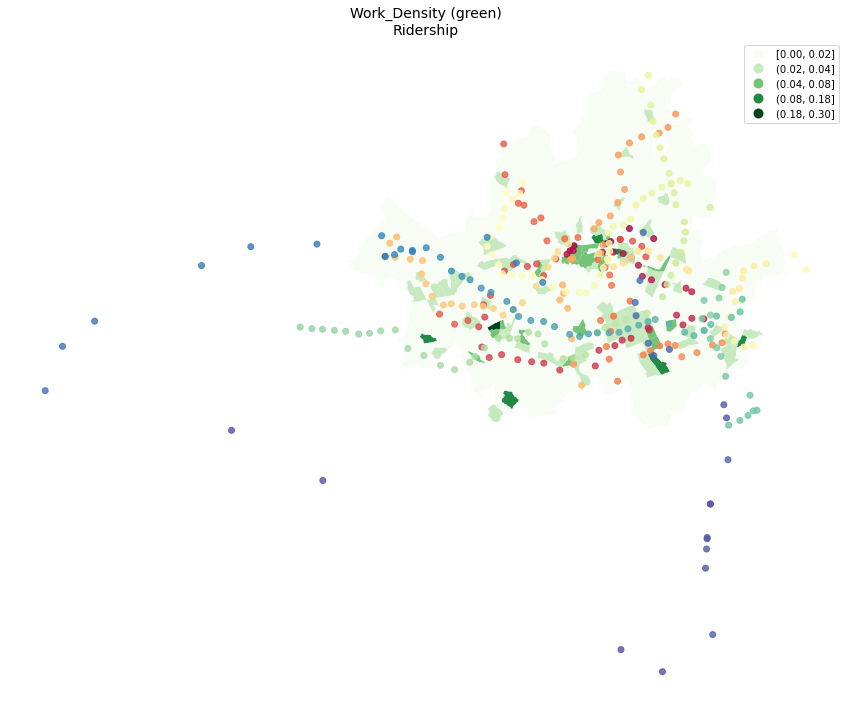

In [18]:
column1 = 'Work_Density'
column2 = 'ridership'
fig,ax = plt.subplots(figsize=(15,15))

Seoul_pop_job_commute.plot(ax=ax,
         column=column1,
         legend=True,
         scheme='NaturalBreaks',
         cmap='Greens'
        )

Seoul_ride[Seoul_ride['ridership'] >= 10].plot(ax=ax,
        alpha=.8,
        linewidth=1,
        scheme='NaturalBreaks',
        cmap='Spectral'
        )
#ax.set_ylim(37.3,37.8) 
ax.set_title(column1 + ' (green)\n' + 'Ridership', fontsize=14)
ax.axis('off');

It is reletively obvious that the areas where jobs are located the most, the ridership points are colored in red, meaning many people are using the station to commute.

Once we obtain the LA ridership data, my plan is to overlay the LA ridership data on other demographic maps like I did for Seoul to see if the rail system is well located and distributed throughout the regions.

This is the end of 206-shinahaudrey-cleannotebook-3. In the next notebook, 206-shinahaudrey-cleannotebook-4, Audrey will show the process of making isochrone maps for the neighborhood pairs we selcted.